# 00 Import Module & Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# 01 Multiple Linear Regression

### (1) statsmodel

In [5]:
# import model
from sklearn.linear_model import LinearRegression

# import statsmodel module
import statsmodels.api as sm

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
data_new = data[['YearBuilt', 'LotFrontage', 'LotArea' ,'SalePrice']].dropna()

In [10]:
data_new.head(3)

,YearBuilt,LotFrontage,LotArea,SalePrice
0,2003,65.0,8450,208500
1,1976,80.0,9600,181500
2,2001,68.0,11250,223500


In [11]:
# 종속변수!
y = data_new.SalePrice

In [12]:
y # pandas series

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1201, dtype: int64

In [13]:
# 독립변수
# indexing을 할 때 여러 개를 넣어주려면 원하는 column의 list를 넣어줘야 해요.
x = data_new[['YearBuilt', 'LotFrontage', 'LotArea']]

In [14]:
x.head(3) # pandas dataframe

,YearBuilt,LotFrontage,LotArea
0,2003,65.0,8450
1,1976,80.0,9600
2,2001,68.0,11250


In [15]:
# add constant
x = sm.add_constant(x)

In [16]:
x.head(3)

,const,YearBuilt,LotFrontage,LotArea
0,1.0,2003,65.0,8450
1,1.0,1976,80.0,9600
2,1.0,2001,68.0,11250


In [17]:
# change x to numpy.array
x = np.asarray(x)

In [18]:
x

array([[1.000e+00, 2.003e+03, 6.500e+01, 8.450e+03],
       [1.000e+00, 1.976e+03, 8.000e+01, 9.600e+03],
       [1.000e+00, 2.001e+03, 6.800e+01, 1.125e+04],
       ...,
       [1.000e+00, 1.941e+03, 6.600e+01, 9.042e+03],
       [1.000e+00, 1.950e+03, 6.800e+01, 9.717e+03],
       [1.000e+00, 1.965e+03, 7.500e+01, 9.937e+03]])

In [19]:
# make linear regression model
model = sm.OLS(y, x).fit()

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     272.2
Date:                Sun, 18 Jun 2023   Prob (F-statistic):          1.13e-134
Time:                        13:47:11   Log-Likelihood:                -15000.
No. Observations:                1201   AIC:                         3.001e+04
Df Residuals:                    1197   BIC:                         3.003e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.497e+06   1.16e+05    -21.579      0.0

### (2) 값 예측

In [21]:
# 여기서는 statsmodels가 아니라 sklearn의 LinearRegression을 이용할 거예요.

# 종속변수
y = data_new.SalePrice

# 독립변수
x = data_new[['YearBuilt', 'LotFrontage', 'LotArea']]

In [23]:
x.values

array([[ 2003.,    65.,  8450.],
       [ 1976.,    80.,  9600.],
       [ 2001.,    68., 11250.],
       ...,
       [ 1941.,    66.,  9042.],
       [ 1950.,    68.,  9717.],
       [ 1965.,    75.,  9937.]])

In [24]:
model = LinearRegression()

In [25]:
model.fit(x.values, y)

LinearRegression()

In [27]:
model.predict([[2023, 70, 10000]])[0]

250192.5093765338

In [28]:
print('2023년 건축되었고, LotFrontage는 70이고, LotArea는 10000인 경우 집값은:')
print(model.predict([[2023, 70, 10000]])[0])

2023년 건축되었고, LotFrontage는 70이고, LotArea는 10000인 경우 집값은:
250192.5093765338


# 02 Data preprocessing

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('titanic.csv')

In [31]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### (1) encoding
머신러닝은 숫자로 돌아갑니다. 모델에 들어가는 문자열을 숫자로 바꿔줍니다.

In [34]:
# Sex 전처리 (male -> 0, female -> 1)
sex_mapping = {'male':0, 'female':1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [35]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### (2) imputation

<AxesSubplot:>

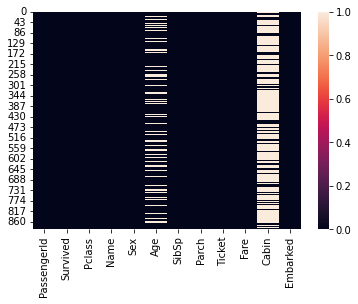

In [36]:
sns.heatmap(df.isnull()) # NA 값이 너무 많은 column은 분석에서 제외.

In [37]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S


In [42]:
len(df)

891

In [39]:
df['Age'].mode()[0] # median of age

24.0

In [40]:
# median 값으로 imputation!
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [41]:
df[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [44]:
# median 값으로 imputation!
df['Embarked'].mode()[0]

'S'

In [45]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [46]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [47]:
# Embarked 전처리 (encoding) (Q -> 0, S -> 1, C -> 2)
embarked_mapping = {'Q':0, 'S':1, 'C':2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [48]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,24.0,0,0,8.4583,0
6,0,1,0,54.0,0,0,51.8625,1
7,0,3,0,2.0,3,1,21.0750,1
8,1,3,1,27.0,0,2,11.1333,1
9,1,2,1,14.0,1,0,30.0708,2


### (3) outlier removal
Fare에 대해 outlier removal을 진행할 거예요!

### 1. visualization

<AxesSubplot:>

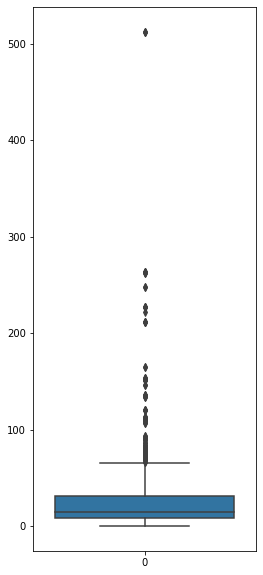

In [49]:
plt.figure(figsize=(4,10))
sns.boxplot(df['Fare'])

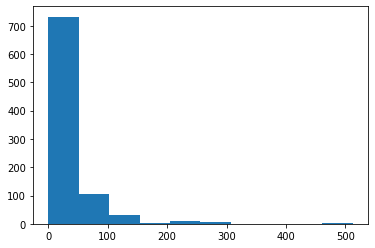

In [51]:
df['Fare'].hist(grid=False)
plt.show()

### 2. skewness
-1과 1사이에 있어야 해요. 이 범위를 벗어나면 outlier가 있는 겁니다.

In [52]:
print('skewness of Age:', df['Age'].skew()) # 비교하려고 넣은 친구
print('skewness of Fare:', df['Fare'].skew())

skewness of Age: 0.6577529069911331
skewness of Fare: 4.787316519674893


### 3. quantile
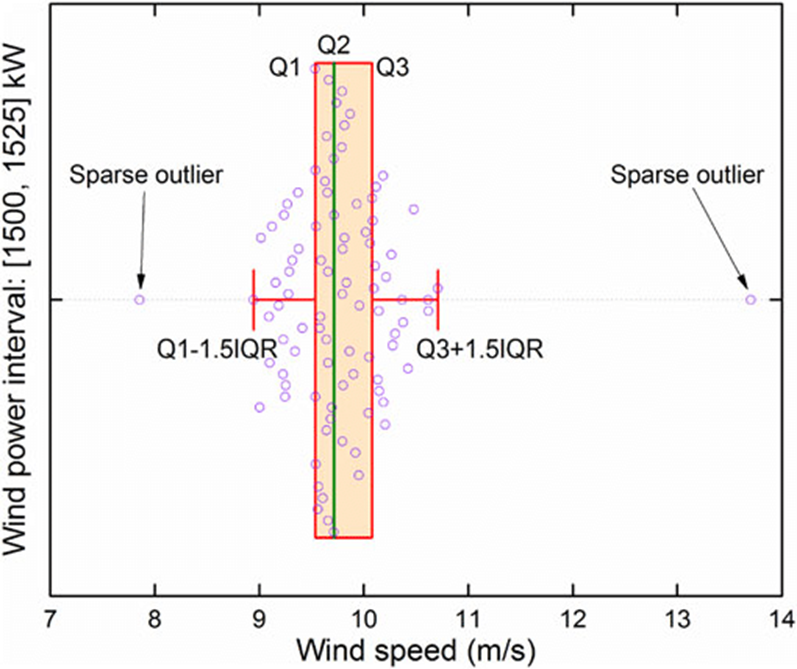

In [53]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3-Q1

In [60]:
whisker_width = 1.5
lower_whisker = Q1-whisker_width*IQR
upper_whisker = Q3+whisker_width*IQR
Fare_outliers = df[(df['Fare'] < lower_whisker)|(df['Fare'] > upper_whisker)]

In [61]:
Fare_outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,2
27,0,1,0,19.0,3,2,263.0000,1
31,1,1,1,24.0,1,0,146.5208,2
34,0,1,0,28.0,1,0,82.1708,2
52,1,1,1,49.0,1,0,76.7292,2
...,...,...,...,...,...,...,...,...
846,0,3,0,24.0,8,2,69.5500,1
849,1,1,1,24.0,1,0,89.1042,2
856,1,1,1,45.0,1,1,164.8667,1
863,0,3,1,24.0,8,2,69.5500,1
